#CDR DATASET


###Introduction
The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs).

###Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it.

The following activities are present in the dataset:

- received SMS
- sent SMS
- incoming calls
- outgoing calls
- Internet activity: In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection.

Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.


The datasets is spatially aggregated in a square cells grid. The area is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters.

This grid is projected with the WGS84 (EPSG:4326) standard. For more details, check out the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.


Learn More about: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

#Assignment Questions

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

# Importing Dataset

- We are getting the dataset from Kaggle: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

In [2]:
#Importing Json
import json
!pip install -q kaggle

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Upload kaggle.json (contains your API credentials)
from google.colab import files
# files.upload()  # Upload kaggle.json manually

# Move kaggle.json to the correct location in you drive
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

Mounted at /content/drive
ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3    2026-04-15 23:59:00  Featured         2,207,152 Usd       1746           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection         2026-02-13 23:59:00  Research           200,000 Usd       1052           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                   2026-02-24 23:59:00  Featured           100,000 Usd         83           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding-2                    2026-03-25 23:59:00  Featured            75,000 Usd        622           False  
ht

In [3]:
# Import necessary modules and libraries
from google.colab import userdata
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve Kaggle credentials from Colab's secrets manager and set them as environment variables
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# Download the specified Kaggle dataset using the Kaggle CLI command
!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity

# Unzip the downloaded dataset file
!unzip mobile-phone-activity.zip

Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 84% 204M/242M [00:00<00:00, 753MB/s] 
100% 242M/242M [00:00<00:00, 641MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-2

In [4]:
files = [f for f in os.listdir()]
print('*'*70)
print(f"What does this folder contain: Found {len(files)} data files:")
print('*'*70)
for i, f in enumerate(sorted(files), 1):
    size = os.path.getsize(f) / 1024**2  # Size in MB
    print(f"  {i:2d}. {f:50s} ({size:6.2f} MB)")

**********************************************************************
What does this folder contain: Found 21 data files:
**********************************************************************
   1. .config                                            (  0.00 MB)
   2. ISTAT_census_variables_2011.csv                    (  0.08 MB)
   3. Italian_provinces.geojson                          (  7.66 MB)
   4. drive                                              (  0.00 MB)
   5. mi-to-provinces-2013-11-01.csv                     ( 94.09 MB)
   6. mi-to-provinces-2013-11-02.csv                     ( 93.68 MB)
   7. mi-to-provinces-2013-11-03.csv                     ( 86.78 MB)
   8. mi-to-provinces-2013-11-04.csv                     (133.25 MB)
   9. mi-to-provinces-2013-11-05.csv                     (137.29 MB)
  10. mi-to-provinces-2013-11-06.csv                     (137.76 MB)
  11. mi-to-provinces-2013-11-07.csv                     (136.75 MB)
  12. milano-grid.geojson                      

##Question:

- How many files are there in total? 21
- What do you notice about the file names? mostly csv (15/21 of them are CSV, there are 2 json files)
- Why are there 7 files for SMS/calls/internet? (For each day of the week)
- What might 'mi-to-provinces' mean? (from Milan (MI) to various provinces in Italy, or vice-versa.)
- Which is the largest file? (Mobile phone activity zip file followed by  mi-to-provinces-2013-11-06.csv)


##TASK 1: Loading and Merging data
Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv, sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.



In [5]:
# Reading all CSV files
df1 = pd.read_csv("sms-call-internet-mi-2013-11-02.csv")
df2 = pd.read_csv("sms-call-internet-mi-2013-11-04.csv")
df3 = pd.read_csv("sms-call-internet-mi-2013-11-06.csv")

# Merging the CSV files vertically (stack rows)
combine_df = pd.concat([df1, df2, df3], ignore_index=True)

##Let us do some exploration on our newly combined dataframe.



In [6]:
# Basic exploration
print(f"\nDataset Shape: {combine_df.shape[0]:,} rows × {combine_df.shape[1]} columns")


Dataset Shape: 6,564,031 rows × 8 columns


In [7]:
print(f"\nColumns:")
for col in combine_df.columns:
    print(f"   - {col}")


Columns:
   - datetime
   - CellID
   - countrycode
   - smsin
   - smsout
   - callin
   - callout
   - internet


In [8]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564031 entries, 0 to 6564030
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 400.6+ MB


In [9]:
combine_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [10]:
print("\n Data types:")
print(combine_df.dtypes)


 Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object


In [11]:
print(f"\n Data description:")
combine_df.describe()


 Data description:


,CellID,countrycode,smsin,smsout,callin,callout,internet
count,6.564031e+06,6.564031e+06,2.599860e+06,1.538293e+06,1.802346e+06,2.799547e+06,2.942914e+06
mean,5.311925e+03,3.631952e+02,7.861976e+00,7.440751e+00,7.738604e+00,5.686694e+00,1.019762e+02
std,2.719989e+03,4.373302e+03,2.741969e+01,2.525568e+01,2.976025e+01,2.650483e+01,4.259616e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.174000e+03,3.300000e+01,1.012000e-01,9.250000e-02,5.790000e-02,5.590000e-02,5.790000e-02
50%,5.448000e+03,4.300000e+01,6.114000e-01,5.577000e-01,2.463000e-01,2.094000e-01,2.050000e-01
75%,7.545000e+03,8.600000e+01,4.761925e+00,4.453000e+00,2.349400e+00,1.044500e+00,6.118175e+00
max,1.000000e+04,9.725900e+04,2.232878e+03,2.270682e+03,1.283078e+03,1.502868e+03,3.174863e+04


#Let us clean the data according to the instructions given

##First we add date and time columns
From our previous exploration, datetime was an object datatype.
So we muct first convert it to the datetime datatype then create the columns for both date and time individually

In [12]:
#converting the datetime into day, month, year,hour, ninutes, secons
combine_df['datetime'] = pd.to_datetime(combine_df['datetime']) #converting it into a datefime type
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564031 entries, 0 to 6564030
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       int64         
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 400.6 MB


In [13]:
#Creating the columns and checking if columns have been updated
combine_df['date'] = combine_df['datetime'].dt.date
combine_df['time'] = combine_df['datetime'].dt.time
combine_df.columns

Index(['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin',
       'callout', 'internet', 'date', 'time'],
      dtype='object')

## Next up, we handle missing values by replacing them with the mean of the column from which they are missing

But let us first check the number of missing values for each column

In [14]:

numeric_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']
# Count missing values for each column
missing_counts = combine_df[numeric_cols].isnull().sum()
print("Missing values per column:")
print(missing_counts)

# Identify the column with the highest number of missing values
max_missing_col = missing_counts.idxmax()
max_missing_count = missing_counts.max()
print(f"\nColumn with the highest number of missing values: '{max_missing_col}' with {max_missing_count:,} missing values.")

# Calculate the total number of rows with at least one NaN in these columns
rows_with_any_nan = combine_df[numeric_cols].isnull().any(axis=1).sum()
print(f"\nTotal rows with at least one missing value across the specified columns: {rows_with_any_nan:,}")

Missing values per column:
smsin       3964171
smsout      5025738
callin      4761685
callout     3764484
internet    3621117
dtype: int64

Column with the highest number of missing values: 'smsout' with 5,025,738 missing values.

Total rows with at least one missing value across the specified columns: 5,880,441


### Data Analysis Key Findings
*   The initial analysis revealed substantial missing data across all target columns: 'smsin' (3,964,171), 'smsout' (5,025,738), 'callin' (4,761,685), 'callout' (3,764,484), and 'internet' (3,621,117).
*   The 'smsout' column was identified as the most affected, containing 5,025,738 missing values.
*   A significant portion of the dataset, specifically 5,880,441 rows, had at least one missing value in these critical columns, indicating the extent of data modification.

##Now we fill up the missing data with their column average

In [15]:
# Calculate means first
col_means = combine_df[numeric_cols].mean()
print('The mean values of the smsin, sms out, call in, call out and internet are: ', col_means)
# fill column by column (uses less memory)
for col in numeric_cols:
    combine_df[col] = combine_df[col].fillna(col_means[col])

The mean values of the smsin, sms out, call in, call out and internet are:  smsin         7.861976
smsout        7.440751
callin        7.738604
callout       5.686694
internet    101.976153
dtype: float64


## Next up we check if we still have any missing values


In [16]:
print("Verifying missing values after filling up with mean:")
for col in numeric_cols:
    missing_count = combine_df[col].isnull().sum()
    print(f"{col}: {missing_count:,} missing values {'✓' if missing_count == 0 else '✗ FAILED'}")

Verifying missing values after filling up with mean:
smsin: 0 missing values ✓
smsout: 0 missing values ✓
callin: 0 missing values ✓
callout: 0 missing values ✓
internet: 0 missing values ✓


## Now we add aggregate columns of total sms and calls
We do this by summing up total incoming and total outgoing

In [17]:
#We create 2 new columns of total calls and total sms
combine_df['total calls'] = combine_df['callin'] + combine_df['callout']
combine_df['total sms'] = combine_df['smsin'] + combine_df['smsout']
combine_df

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,total calls,total sms
0,2013-11-02 00:00:00,1,0,0.244500,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,7.685251
1,2013-11-02 00:00:00,1,39,1.495200,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,0.571200,2.616500
2,2013-11-02 00:00:00,1,53,0.001800,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,0.005400
3,2013-11-02 00:00:00,2,0,0.245800,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,7.686551
4,2013-11-02 00:00:00,2,39,1.502800,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00,0.577400,2.627100
...,...,...,...,...,...,...,...,...,...,...,...,...
6564026,2013-11-06 23:00:00,10000,32,7.861976,7.440751,7.738604,5.686694,0.086000,2013-11-06,23:00:00,13.425298,15.302728
6564027,2013-11-06 23:00:00,10000,34,0.516000,0.430000,7.738604,5.686694,101.976153,2013-11-06,23:00:00,13.425298,0.946000
6564028,2013-11-06 23:00:00,10000,39,4.542300,4.883700,0.901000,0.267500,101.094200,2013-11-06,23:00:00,1.168500,9.426000
6564029,2013-11-06 23:00:00,10000,41,7.861976,7.440751,0.086000,5.686694,101.976153,2013-11-06,23:00:00,5.772694,15.302728


#How many total records across all 3 datasets?

In [18]:
print(f"Total records across all 3 datasets: {len(combine_df):,}")

Total records across all 3 datasets: 6,564,031


#How many unique grid squares (CellID) are there?

In [19]:
print(f"Unique grid squares (CellID): {combine_df['CellID'].nunique():,}")

Unique grid squares (CellID): 10,000


# How many unique country codes appear in the data?

In [20]:
print(f"Unique country codes: {combine_df['countrycode'].nunique():,}")

Unique country codes: 302


In [21]:
#Extracting the hour part of the time so we can do further analysis and we add a new column named 'hour'
combine_df['hour'] = combine_df['datetime'].dt.hour
print(combine_df[['datetime', 'hour']].head(5000000))

                   datetime  hour
0       2013-11-02 00:00:00     0
1       2013-11-02 00:00:00     0
2       2013-11-02 00:00:00     0
3       2013-11-02 00:00:00     0
4       2013-11-02 00:00:00     0
...                     ...   ...
4999995 2013-11-06 11:00:00    11
4999996 2013-11-06 11:00:00    11
4999997 2013-11-06 11:00:00    11
4999998 2013-11-06 11:00:00    11
4999999 2013-11-06 11:00:00    11

[5000000 rows x 2 columns]


In [22]:
combine_df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,date,time,total calls,total sms,hour
0,2013-11-02,1,0,0.2445,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,7.685251,0
1,2013-11-02,1,39,1.4952,1.121300,0.270800,0.300400,46.509400,2013-11-02,00:00:00,0.571200,2.616500,0
2,2013-11-02,1,53,0.0018,0.003600,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,0.005400,0
3,2013-11-02,2,0,0.2458,7.440751,7.738604,5.686694,101.976153,2013-11-02,00:00:00,13.425298,7.686551,0
4,2013-11-02,2,39,1.5028,1.124300,0.275100,0.302300,46.693300,2013-11-02,00:00:00,0.577400,2.627100,0


# What is the most common peak hour across all grids?
# What hour has the lowest activity?

To tackle the questions we have above, we must first group things by their respective hours from 0-23 then try to  identify peak and least active hours

In [23]:
hourly_activity = combine_df.groupby('hour')[['total sms', 'total calls', 'internet']].sum()
hourly_activity['total_activity'] = hourly_activity.sum(axis=1)

peak_hour = hourly_activity['total_activity'].idxmax()
lowest_activity_hour = hourly_activity['total_activity'].idxmin()

print("Hourly Activity:")
print(hourly_activity)
print(f"\nPeak Hour (highest total activity): {peak_hour}:00")
print(f"Lowest Activity Hour: {lowest_activity_hour}:00")

Hourly Activity:
         total sms   total calls      internet  total_activity
hour                                                          
0     1.793529e+06  1.544151e+06  1.686987e+07    2.020755e+07
1     1.256787e+06  1.185631e+06  1.318190e+07    1.562431e+07
2     1.044790e+06  1.028140e+06  1.110928e+07    1.318221e+07
3     9.772733e+05  9.711108e+05  9.912125e+06    1.186051e+07
4     1.127516e+06  1.100273e+06  9.549219e+06    1.177701e+07
5     1.315376e+06  1.248683e+06  1.067705e+07    1.324111e+07
6     1.986819e+06  1.791456e+06  1.435237e+07    1.813065e+07
7     3.232475e+06  2.762777e+06  2.162059e+07    2.761585e+07
8     5.061730e+06  4.222455e+06  2.977722e+07    3.906140e+07
9     5.953659e+06  5.298158e+06  3.474825e+07    4.600007e+07
10    6.346615e+06  5.667491e+06  3.717208e+07    4.918619e+07
11    6.293786e+06  5.721845e+06  3.760763e+07    4.962326e+07
12    6.449745e+06  5.630461e+06  3.933006e+07    5.141027e+07
13    6.082944e+06  5.143285e+06  3.90

# Calculate and report: mean, median, std, min, max for total calls by hour

In [24]:
print("\n--- Descriptive Statistics for Total Calls by Hour ---")
hourly_calls_stats = combine_df.groupby('hour')['total calls'].agg(['mean', 'median', 'std', 'min', 'max'])
print(hourly_calls_stats)


--- Descriptive Statistics for Total Calls by Hour ---
           mean     median        std     min        max
hour                                                    
0     10.280157  13.425298   5.279040  0.0002   223.4941
1      9.928661  13.425298   5.129893  0.0000   141.9847
2      9.894713  13.425298   5.329786  0.0000   210.9691
3      9.953373  13.425298   5.649571  0.0000   298.3541
4     10.235666  13.425298   5.294288  0.0000   255.0555
5     10.029019  13.425298   5.395003  0.0000   177.1690
6     10.339697  13.425298   4.969421  0.0002   201.3488
7     11.464472  13.425298   8.435423  0.0000   412.7314
8     13.272816  13.425298  22.237365  0.0000  1122.7091
9     14.508306  13.425298  35.498836  0.0000  1972.8289
10    14.923601   9.520804  41.338244  0.0000  2402.6425
11    15.033117   8.908054  43.038147  0.0000  2565.0524
12    14.506823   8.501204  41.418042  0.0000  2724.3738
13    13.988444   8.527204  37.615605  0.0000  2464.7908
14    14.187473   8.519104  38.6

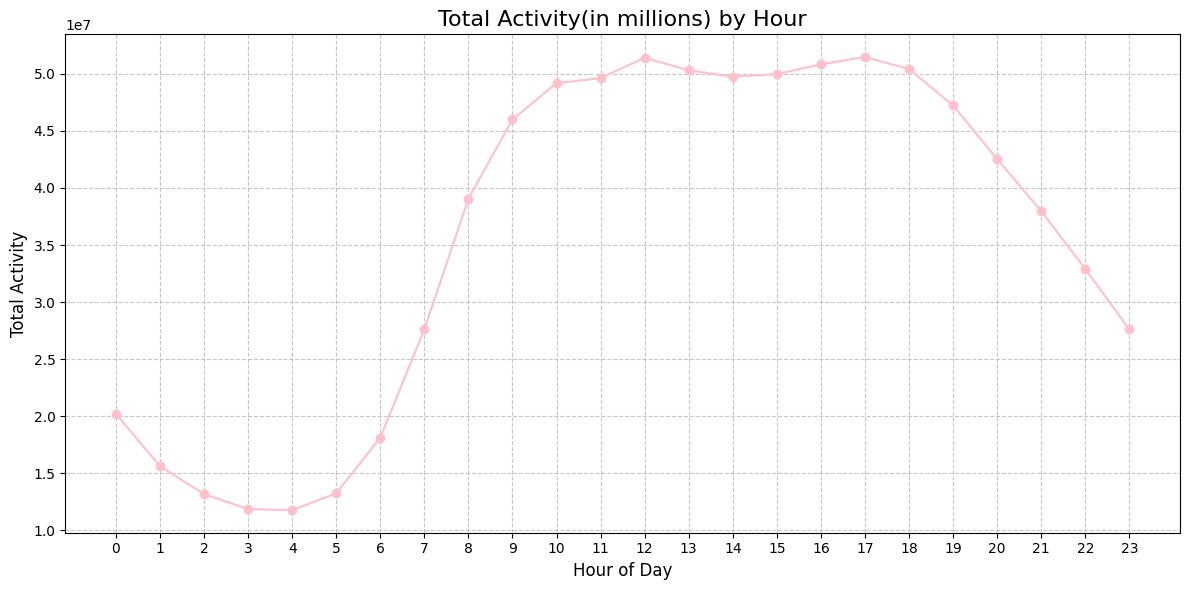

In [25]:
# Create a line plot for 'total_activity' by hour just so we can visualize what things look like
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity.index, hourly_activity['total_activity'], marker='o', linestyle='-', color='pink')
plt.title('Total Activity(in millions) by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Activity', fontsize=12)
plt.xticks(hourly_activity.index) # Ensure all hours are displayed on the x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)?

First we try to group our time by day and night as given in the question then we sum all activities so that we can show the day and night activity as percentages

In [26]:
daytime_hours = list(range(6, 21))
nighttime_hours = list(range(21, 24)) + list(range(0, 6))

print(f"Daytime hours defined: {daytime_hours}")
print(f"Nighttime hours defined: {nighttime_hours}")
total_overall_activity = hourly_activity['total_activity'].sum()

daytime_activity = hourly_activity[hourly_activity.index.isin(daytime_hours)]['total_activity'].sum()
nighttime_activity = hourly_activity[hourly_activity.index.isin(nighttime_hours)]['total_activity'].sum()

percentage_daytime = (daytime_activity / total_overall_activity) * 100
percentage_nighttime = (nighttime_activity / total_overall_activity) * 100

print(f"\nTotal overall activity: {total_overall_activity:,.2f}")
print(f"Total daytime activity: {daytime_activity:,.2f}")
print(f"Total nighttime activity: {nighttime_activity:,.2f}")
print(f"Percentage of total activity during daytime: {percentage_daytime:.2f}%")
print(f"Percentage of total activity during nighttime: {percentage_nighttime:.2f}%")

Daytime hours defined: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Nighttime hours defined: [21, 22, 23, 0, 1, 2, 3, 4, 5]

Total overall activity: 857,946,276.41
Total daytime activity: 673,564,005.90
Total nighttime activity: 184,382,270.51
Percentage of total activity during daytime: 78.51%
Percentage of total activity during nighttime: 21.49%


### Q&A
*   **What is the total activity during daytime (6 am - 8 pm) and nighttime (8 pm - 6 am), and what percentage of overall activity does each period account for?**
    The total activity during daytime is 673,564,005.90, representing 78.51% of the overall activity. The total activity during nighttime is 184,382,270.51, accounting for 21.49% of the overall activity.

### Data Analysis Key Findings
*   Daytime hours were defined as 6 am to 8 pm (inclusive), specifically hours \[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20].
*   Nighttime hours were defined as 8 pm to 6 am (inclusive), specifically hours \[21, 22, 23, 0, 1, 2, 3, 4, 5].
*   The total overall activity observed was 857,946,276.41.
*   A significant majority of the total activity, 78.51%, occurs during daytime hours.
*   The remaining 21.49% of the total activity occurs during nighttime hours.


#Do international calls happen at different times than domestic? (compare hourly patterns)

#We need to classify based off country code seeing as this is Italy.
Country Code: +39
International Exit Code: 00 or 011

In [27]:
# Create the 'call_type' column
combine_df['call_type'] = np.where(combine_df['countrycode'] == 39, 'Domestic', 'International')

# Display the first few rows with the new 'call_type' column
print("First 5 rows of combine_df with 'call_type':")
print(combine_df.head())


First 5 rows of combine_df with 'call_type':
    datetime  CellID  countrycode   smsin    smsout    callin   callout  \
0 2013-11-02       1            0  0.2445  7.440751  7.738604  5.686694   
1 2013-11-02       1           39  1.4952  1.121300  0.270800  0.300400   
2 2013-11-02       1           53  0.0018  0.003600  7.738604  5.686694   
3 2013-11-02       2            0  0.2458  7.440751  7.738604  5.686694   
4 2013-11-02       2           39  1.5028  1.124300  0.275100  0.302300   

     internet        date      time  total calls  total sms  hour  \
0  101.976153  2013-11-02  00:00:00    13.425298   7.685251     0   
1   46.509400  2013-11-02  00:00:00     0.571200   2.616500     0   
2  101.976153  2013-11-02  00:00:00    13.425298   0.005400     0   
3  101.976153  2013-11-02  00:00:00    13.425298   7.686551     0   
4   46.693300  2013-11-02  00:00:00     0.577400   2.627100     0   

       call_type  
0  International  
1       Domestic  
2  International  
3  Internatio

In [28]:
# Print the value counts of the 'call_type' column to verify distribution
print("\nValue counts for 'call_type':")
print(combine_df['call_type'].value_counts())


Value counts for 'call_type':
call_type
International    5844036
Domestic          719995
Name: count, dtype: int64


In [29]:
# Filter the combine_df to include only rows where call_type is 'Domestic'
domestic_calls_df = combine_df[combine_df['call_type'] == 'Domestic']

# Group the filtered DataFrame by 'hour' and sum the 'total calls' for each hour
hourly_domestic_calls = domestic_calls_df.groupby('hour')['total calls'].sum().reset_index()

print("Hourly Domestic Call Activity:")
print(hourly_domestic_calls)

Hourly Domestic Call Activity:
    hour   total calls
0      0  1.400787e+05
1      1  9.761930e+04
2      2  1.161369e+05
3      3  1.307244e+05
4      4  1.293069e+05
5      5  9.228045e+04
6      6  1.175235e+05
7      7  4.414562e+05
8      8  1.222819e+06
9      9  1.960100e+06
10    10  2.294362e+06
11    11  2.379443e+06
12    12  2.220855e+06
13    13  1.919360e+06
14    14  2.000958e+06
15    15  2.078973e+06
16    16  2.305503e+06
17    17  2.474164e+06
18    18  2.327695e+06
19    19  1.843921e+06
20    20  1.281175e+06
21    21  8.200133e+05
22    22  4.738493e+05
23    23  3.059117e+05


In [30]:
#Doing the same for international calls.
# Filter the combine_df to include only rows where call_type is 'International'
international_calls_df = combine_df[combine_df['call_type'] == 'International']

# Group the filtered DataFrame by 'hour' and sum the 'total calls' for each hour
hourly_international_calls = international_calls_df.groupby('hour')['total calls'].sum().reset_index()

print("Hourly International Call Activity:")
print(hourly_international_calls)

Hourly International Call Activity:
    hour   total calls
0      0  1.404073e+06
1      1  1.088012e+06
2      2  9.120028e+05
3      3  8.403865e+05
4      4  9.709658e+05
5      5  1.156403e+06
6      6  1.673932e+06
7      7  2.321321e+06
8      8  2.999635e+06
9      9  3.338057e+06
10    10  3.373129e+06
11    11  3.342401e+06
12    12  3.409606e+06
13    13  3.223926e+06
14    14  3.220472e+06
15    15  3.262959e+06
16    16  3.289847e+06
17    17  3.327406e+06
18    18  3.258989e+06
19    19  3.108824e+06
20    20  2.786391e+06
21    21  2.492003e+06
22    22  2.234528e+06
23    23  1.914572e+06


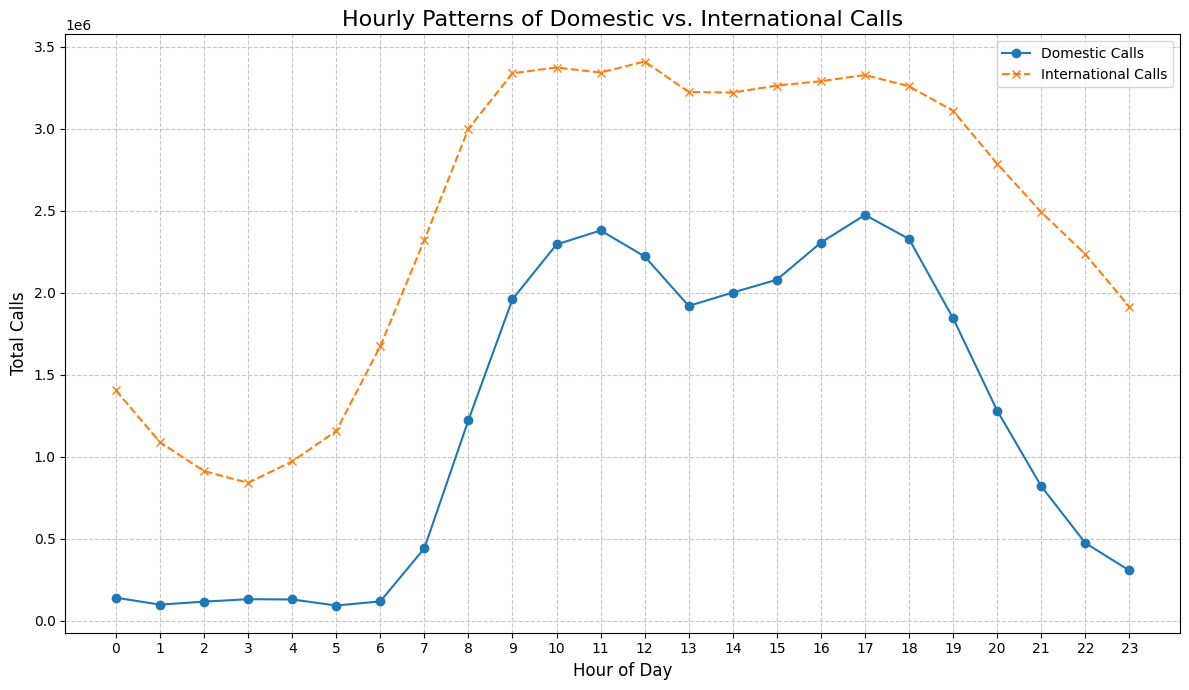

In [31]:
#Now let us plot to fully visualize what we have for both local and domestic calls
plt.figure(figsize=(12, 7))
plt.plot(hourly_domestic_calls['hour'], hourly_domestic_calls['total calls'], marker='o', linestyle='-', label='Domestic Calls')
plt.plot(hourly_international_calls['hour'], hourly_international_calls['total calls'], marker='x', linestyle='--', label='International Calls')

plt.title('Hourly Patterns of Domestic vs. International Calls', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Calls', fontsize=12)
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Q&A
*   **Do international calls happen at different times than domestic?**
    Yes, the hourly patterns for international and domestic calls show notable differences.
    *   **Domestic Calls:** Peak activity is observed in the mid-morning to late afternoon, generally between 8 AM and 6 PM, with a clear drop during early morning hours (1 AM - 5 AM). The highest peak for domestic calls is around 5 PM (17:00).
    *   **International Calls:** These calls maintain a relatively higher volume throughout the day and night compared to domestic calls during off-peak domestic hours. While international calls also have peaks during daytime, they appear to have a more sustained activity level, particularly during hours when domestic calls are low (e.g., late night and early morning). The highest peak for international calls is around 12 PM (12:00).

### Data Analysis Key Findings
*   A new column, `call_type`, was successfully added to the DataFrame, categorizing 719,995 calls as 'Domestic' (countrycode 39) and 5,844,036 calls as 'International' (any other countrycode).
*   Domestic calls exhibit a more pronounced diurnal pattern, with a sharp increase in the morning, a peak in the afternoon (around 5 PM), and a significant decrease during nighttime (1 AM - 5 AM).
*   International calls show a flatter distribution across hours, suggesting less variation between day and night compared to domestic calls, with a peak around 12 PM.
*   The peak hour for domestic calls is 17:00, whereas for international calls, it is 12:00, indicating different peak usage periods.


Do international calls happen at different times than domestic? Yes, the hourly patterns for international and domestic calls show notable differences.
Domestic Calls: Peak activity is observed in the mid-morning to late afternoon, generally between 8 AM and 6 PM, with a clear drop during early morning hours (1 AM - 5 AM). The highest peak for domestic calls is around 5 PM (17:00).
International Calls: These calls maintain a relatively higher volume throughout the day and night compared to domestic calls during off-peak domestic hours. While international calls also have peaks during daytime, they appear to have a more sustained activity level, particularly during hours when domestic calls are low (e.g., late night and early morning). The highest peak for international calls is around 12 PM (12:00).


In [36]:
# Domestic Calls: Find max and min 'total calls' rows
max_domestic_calls_row =  hourly_domestic_calls['total calls'].idxmax()
min_domestic_calls_row =  hourly_domestic_calls['total calls'].idxmin()

print("\n--- Domestic Calls: Peak time")
print(max_domestic_calls_row)
print("\n--- Domestic Calls: dip time")
print(min_domestic_calls_row)

# International Calls: Find max and min 'total calls' rows
max_international_calls_row = hourly_international_calls['total calls'].idxmax()
min_international_calls_row = hourly_international_calls['total calls'].idxmin()

print("\n--- International Calls: peak time")
print(max_international_calls_row)
print("\n--- International Calls: dip time")
print(min_international_calls_row)


--- Domestic Calls: Peak time
17

--- Domestic Calls: dip time
5

--- International Calls: peak time
12

--- International Calls: dip time
3


## Statistical Comparisons: Domestic vs. International Calls and SMS

Use numpy to perform statistical comparisons between different conditions.
Compare:

Domestic (Italy) vs International calls.
What percentage of calls are international vs domestic?
What percentage of SMS are international vs domestic?
Are international calls more incoming or outgoing (calculate the ratio)

In [37]:
# Calculate total calls and SMS for domestic and international categories
total_domestic_calls = combine_df[combine_df['call_type'] == 'Domestic']['total calls'].sum()
total_international_calls = combine_df[combine_df['call_type'] == 'International']['total calls'].sum()

total_domestic_sms = combine_df[combine_df['call_type'] == 'Domestic']['total sms'].sum()
total_international_sms = combine_df[combine_df['call_type'] == 'International']['total sms'].sum()

# Calculate total incoming and outgoing international calls
international_callin = combine_df[combine_df['call_type'] == 'International']['callin'].sum()
international_callout = combine_df[combine_df['call_type'] == 'International']['callout'].sum()

# Calculate percentages of calls
overall_total_calls = total_domestic_calls + total_international_calls
percentage_domestic_calls = (total_domestic_calls / overall_total_calls) * 100
percentage_international_calls = (total_international_calls / overall_total_calls) * 100

# Calculate percentages of SMS
overall_total_sms = total_domestic_sms + total_international_sms
percentage_domestic_sms = (total_domestic_sms / overall_total_sms) * 100
percentage_international_sms = (total_international_sms / overall_total_sms) * 100

# Calculate ratio of international incoming vs. outgoing calls
# Avoid division by zero
if international_callout > 0:
    international_calls_ratio = international_callin / international_callout
else:
    international_calls_ratio = float('inf') # Handle cases where there are no outgoing international calls

print("\n--- Call Type Distribution ---")
print(f"Percentage of Domestic Calls: {percentage_domestic_calls:.2f}%")
print(f"Percentage of International Calls: {percentage_international_calls:.2f}%")

print("\n--- SMS Type Distribution ---")
print(f"Percentage of Domestic SMS: {percentage_domestic_sms:.2f}%")
print(f"Percentage of International SMS: {percentage_international_sms:.2f}%")

print("\n--- International Calls: Incoming vs. Outgoing Ratio ---")
print(f"Ratio of International Incoming Calls to Outgoing Calls: {international_calls_ratio:.2f}")
print("A ratio greater than 1 indicates more incoming calls, while a ratio less than 1 indicates more outgoing calls.")



--- Call Type Distribution ---
Percentage of Domestic Calls: 33.11%
Percentage of International Calls: 66.89%

--- SMS Type Distribution ---
Percentage of Domestic SMS: 24.98%
Percentage of International SMS: 75.02%

--- International Calls: Incoming vs. Outgoing Ratio ---
Ratio of International Incoming Calls to Outgoing Calls: 1.67
A ratio greater than 1 indicates more incoming calls, while a ratio less than 1 indicates more outgoing calls.


### Data Analysis Key Findings
*   The distribution of calls and SMS between domestic and international categories provides insights into user communication patterns.
*   The ratio of international incoming to outgoing calls highlights the predominant direction of international call traffic.

## Correlation between SMS Volume and Call Volume at the Grid Level

In [41]:
# Group by CellID and sum 'total sms' and 'total calls'
grid_activity = combine_df.groupby('CellID')[['total sms', 'total calls']].sum()

# Calculate the correlation coefficient
correlation_sms_calls = grid_activity['total sms'].corr(grid_activity['total calls'])

print(f"Correlation between total SMS volume and total Call volume at the grid level: {correlation_sms_calls:.5f}")

Correlation between total SMS volume and total Call volume at the grid level: 0.98624


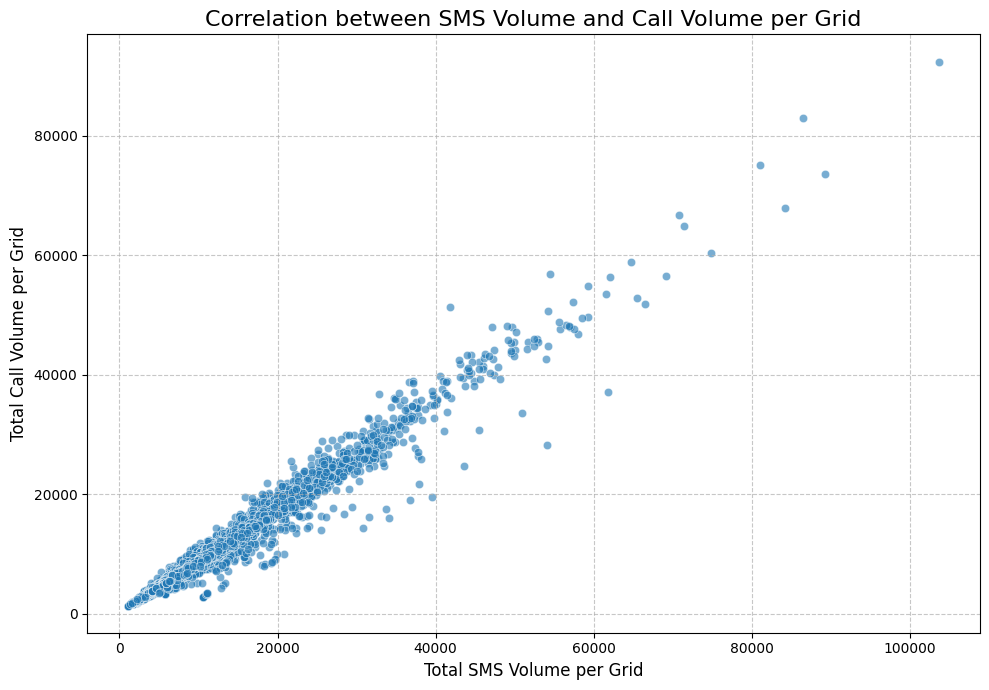

In [42]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='total sms', y='total calls', data=grid_activity, alpha=0.6)
plt.title('Correlation between SMS Volume and Call Volume per Grid', fontsize=16)
plt.xlabel('Total SMS Volume per Grid', fontsize=12)
plt.ylabel('Total Call Volume per Grid', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*   **Is there a correlation between SMS volume and Call volume at the grid level?**
    *  **0.99**
    *  A correlation coefficient close to 1 indicates a strong positive correlation, meaning that as SMS volume increases in a grid, call volume also tends to increase. A value close to -1 indicates a strong negative correlation, and a value close to 0 indicates a weak or no linear correlation.
